# Proyek Analisis Data: [Bike Share]
- **Nama:** [Ogi Wemy Corinta]
- **Email:** [s22110060@student.unklab.ac.id]
- **ID Dicoding:** [ogi_wemy_corinta]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : berapa rata-rata total sewa sepeda pada hari libur dibandingkan dengan hari kerja?
- Pertanyaan 2 : bagaimana pengaruh kondisi cuaca terhadap jumlah total sewa sepeda pada hari-hari yang tidak termasuk libur?
- Pertanyaan 3 :  berapa rata-rata total sewa sepeda pada hari-hari libur selama bulan mei?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data wrangling adalah proses mengubah dan membersihkan data mentah menjadi format yang lebih terstruktur dan siap untuk dianalisis. Tujuannya adalah agar data lebih mudah dibaca, dipahami, dan diolah lebih lanjut. 

### Gathering Data

Gathering data adalah proses mengumpulkan data dari berbagai sumber untuk digunakan dalam analisis. Beberapa metode pengumpulan data meliputi:
* Mengunduh data dari database atau sistem penyimpanan data.
* Mengakses data melalui API (Application Programming Interface).
* Mengekstrak data dari file seperti CSV, Excel, atau JSON.
* Melakukan web scraping untuk mengambil data dari halaman web.
* Mengumpulkan data dari sensor atau perangkat IoT. Tujuan dari gathering data adalah untuk mendapatkan data mentah yang relevan dengan tujuan analisis.

di proyek akhir ini saya menggunakan data bike sharing, yang berisikan 2 file csv yang pertama day.csv dan hour.csv

In [2]:
day_df = pd.read_csv('D:\submission\data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('D:\submission\data\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

assessing data yaitu mengevaluasi kualitas dan kesesuaian data untuk analisis. Beberapa aspek yang perlu dinilai meliputi:
Kelengkapan data: Memeriksa apakah ada nilai yang hilang atau tidak lengkap dalam data.
Konsistensi data: Memastikan data konsisten secara format dan isi di seluruh dataset.
Akurasi data: Mengevaluasi apakah data yang dikumpulkan akurat dan sesuai dengan realitas.
Relevansi data: Menilai apakah data yang dikumpulkan relevan dengan tujuan analisis. Assessing data membantu mengidentifikasi masalah kualitas data yang perlu ditangani sebelum melanjutkan ke tahap cleaning data.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


data day.csv dan hour.csv tidak memiliki missing value maupun data yang terduplikat

In [9]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dataset day.csv memiliki 731 entri yang terdiri dari beberapa kolom, termasuk tanggal, musim, tahun, bulan, hari libur, waktu kerja, cuaca, suhu, suhu perasaan, kelembaban, kecepatan angin, jumlah pengunjung casual, jumlah pengunjung terdaftar, dan total rental.

Musim paling umum adalah musim panas (season 2). Tahun yang dominan adalah tahun 2012 (yr = 1). Bulan yang paling sering muncul adalah Juli (mnth 7). Hari libur hanya ada sekitar 2.87% dari total hari. Hari kerja adalah mayoritas (sekitar 68.40%). Cuaca rata-rata pada keadaan yang baik (weathersit 1) dengan suhu rata-rata sekitar 0.50 (41°C), suhu perasaan rata-rata sekitar 0.47 (50°C), kelembaban rata-rata sekitar 0.47 (47%), kecepatan angin rata-rata adalah sekitar 0.63 (67% dari maksimal), jumlah pengunjung casual rata-rata sekitar 848, jumlah pengunjung terdaftar rata-rata sekitar 3656, dan total rental rata-rata sekitar 4504 per hari.

In [10]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dataset hour.csv mempunyai sekitar 17.379 entri. 
season: 2.50, yang menunjukkan musim rata-rata.
year: 0.50, yang mengindikasikan perbandingan antara tahun 2011 dan 2012.
month: 6.54, yang menunjukkan bulan rata-rata dalam setahun.
hour: 11.55, yang mengindikasikan jam rata-rata dalam sehari.holliday: 0.03, persentase hari libur.
weekday: 3.00, yang menunjukkan hari rata-rata dalam seminggu.workingday: 0.68, persentase hari kerja.
weathersit: 1.43, kondisi cuaca rata-rata.Suhu (temp): 0.50, suhu rata-rata yang normal.
atemp: 0.48, suhu perasaan mendekati suhu sebenarnya.Kelembaban: 0.48, kelembaban rata-rata.
windspeed: 0.63, kecepatan angin rata-rata.
Pengguna casual: 35.68, rata-rata jumlah pengguna casual.Pengguna terdaftar: 153.79, rata-rata jumlah pengguna terdaftar.Total rental sepeda (cnt): 189.46, rata-rata jumlah total rental sepeda.

### Cleaning Data
Cleaning data adalah proses mengatasi masalah kualitas data yang teridentifikasi selama assessing data. Beberapa teknik pembersihan data meliputi:
Menghapus data duplikat: Menghilangkan baris data yang terduplikasi untuk menghindari redundansi.
Menangani missing values: Mengisi nilai yang hilang dengan teknik seperti interpolasi, rata-rata, atau menghapus baris dengan missing values.
Memperbaiki inkonsistensi: Menyeragamkan format data, seperti format tanggal, satuan ukuran, atau penulisan nama yang berbeda-beda.
Menghapus outlier: Mengidentifikasi dan menangani nilai ekstrem yang mungkin merupakan kesalahan pencatatan atau anomali.
Mengatasi kesalahan pengetikan: Memperbaiki kesalahan ejaan atau pengetikan dalam data. Tujuan dari cleaning data adalah untuk menghasilkan dataset yang bersih, konsisten, dan siap untuk dianalisis lebih lanjut.

In [11]:
day_df.rename(columns={'instant':'Id',
                        'dteday':'datetimes',
                        'workingday':'working_Day',
                       'weathersit':'weather_Condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_Count',
                       'yr':'year'},inplace=True)

hour_df.rename(columns={'instant':'Id',
                        'dteday':'datetimes',
                        'workingday':'is_working_Day',
                       'weathersit':'weather_Condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_Count',
                       'yr':'year'},inplace=True)

In [12]:
day_df.head()

,Id,datetimes,season,year,month,holiday,weekday,working_Day,weather_Condition,temp,atemp,humidity,windspeed,casual,registered,total_Count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_df.head()

,Id,datetimes,season,year,month,hr,holiday,weekday,is_working_Day,weather_Condition,temp,atemp,humidity,windspeed,casual,registered,total_Count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


dikarenakan kedua data tersebut tidak memiliki missing value maupun duplikasi data jadi yang kita lakukan hanya mengganti beberapa nama columnnya saja.

In [14]:
day_df["datetimes"] = pd.to_datetime(day_df["datetimes"])
hour_df["datetimes"] = pd.to_datetime(hour_df["datetimes"])

In [15]:
print('day_df["datetimes"] : ', day_df["datetimes"].dtypes)
print('hour_df["datetimes"] : ', hour_df["datetimes"].dtypes)

day_df["datetimes"] :  datetime64[ns]
hour_df["datetimes"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_df.describe(include="all")

,Id,datetimes,season,year,month,holiday,weekday,working_Day,weather_Condition,temp,atemp,humidity,windspeed,casual,registered,total_Count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


yang pertama saya akan mencari korelasi antar variable di day.csv

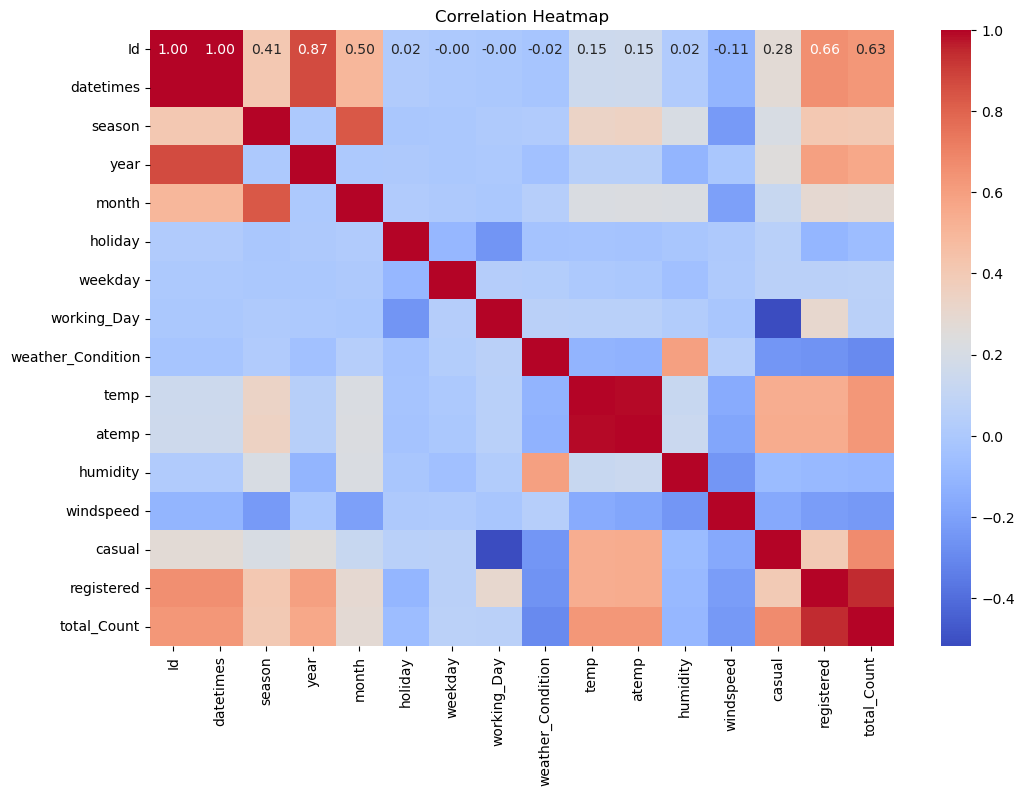

In [17]:
correlation = day_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Distribusi pengguna di tiap bulan

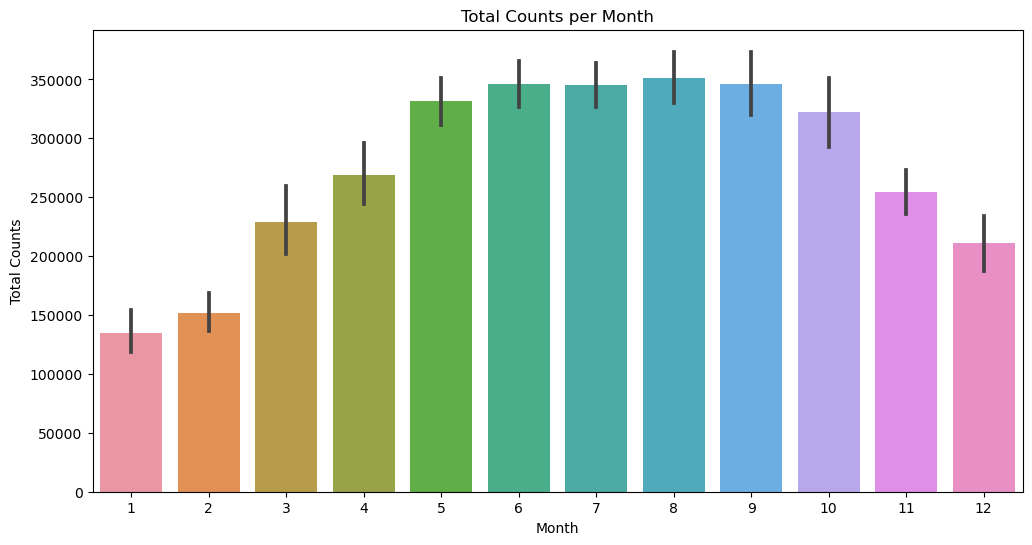

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_Count', data=day_df, estimator=sum)
plt.title('Total Counts per Month')
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.show()

Distribusi pengguna bike per musim

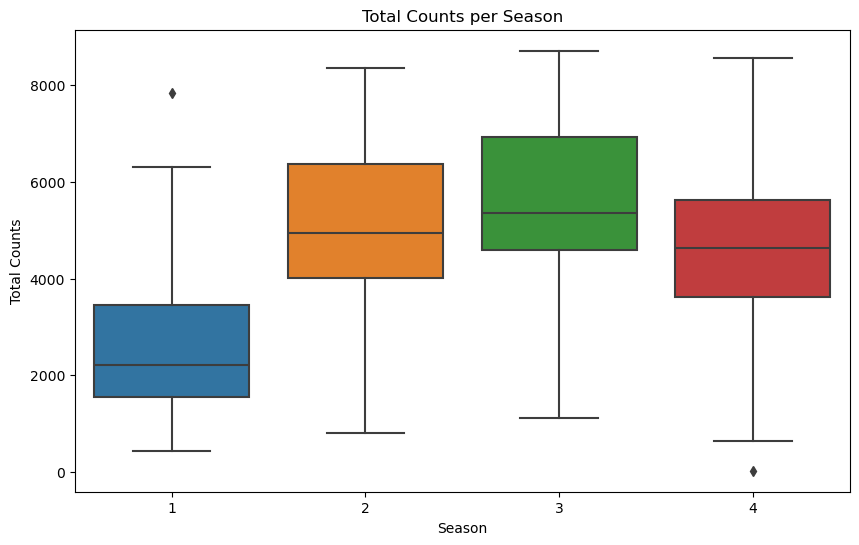

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='total_Count', data=day_df)
plt.title('Total Counts per Season')
plt.xlabel('Season')
plt.ylabel('Total Counts')
plt.show()

Distribusi pengguna sepeda pada hari kerja dan hari libur

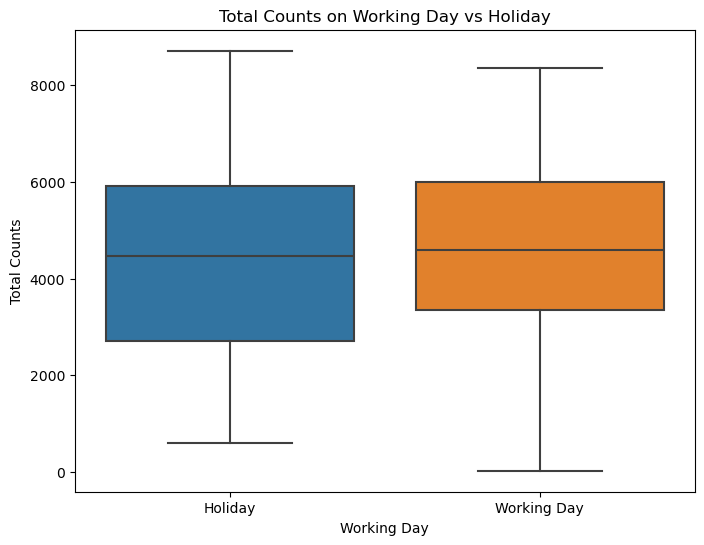

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='working_Day', y='total_Count', data=day_df)
plt.title('Total Counts on Working Day vs Holiday')
plt.xlabel('Working Day')
plt.ylabel('Total Counts')
plt.xticks([0, 1], ['Holiday', 'Working Day'])
plt.show()

Distribusi pengguna sepeda pada hari dalam seminggu

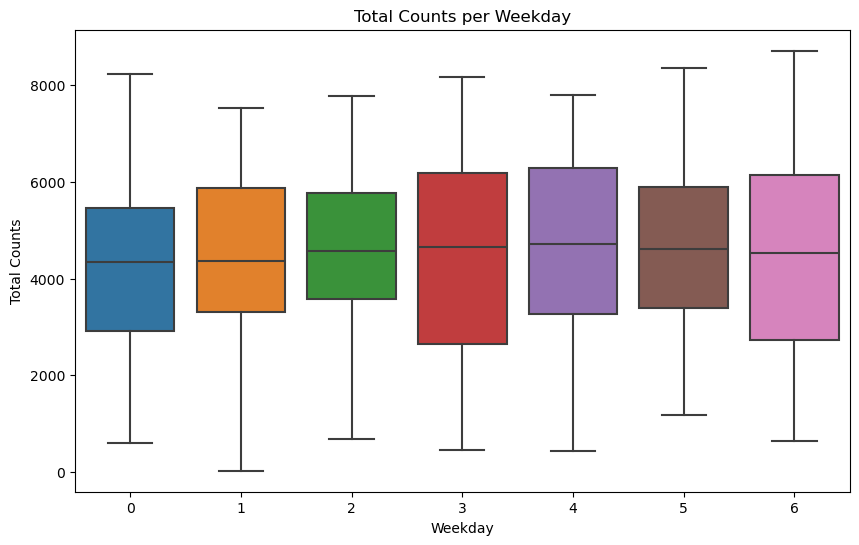

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='total_Count', data=day_df)
plt.title('Total Counts per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Counts')
plt.show()

### Explore hour_df

In [22]:
hour_df.describe(include='all')

,Id,datetimes,season,year,month,hr,holiday,weekday,is_working_Day,weather_Condition,temp,atemp,humidity,windspeed,casual,registered,total_Count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Korelasi antar variabel

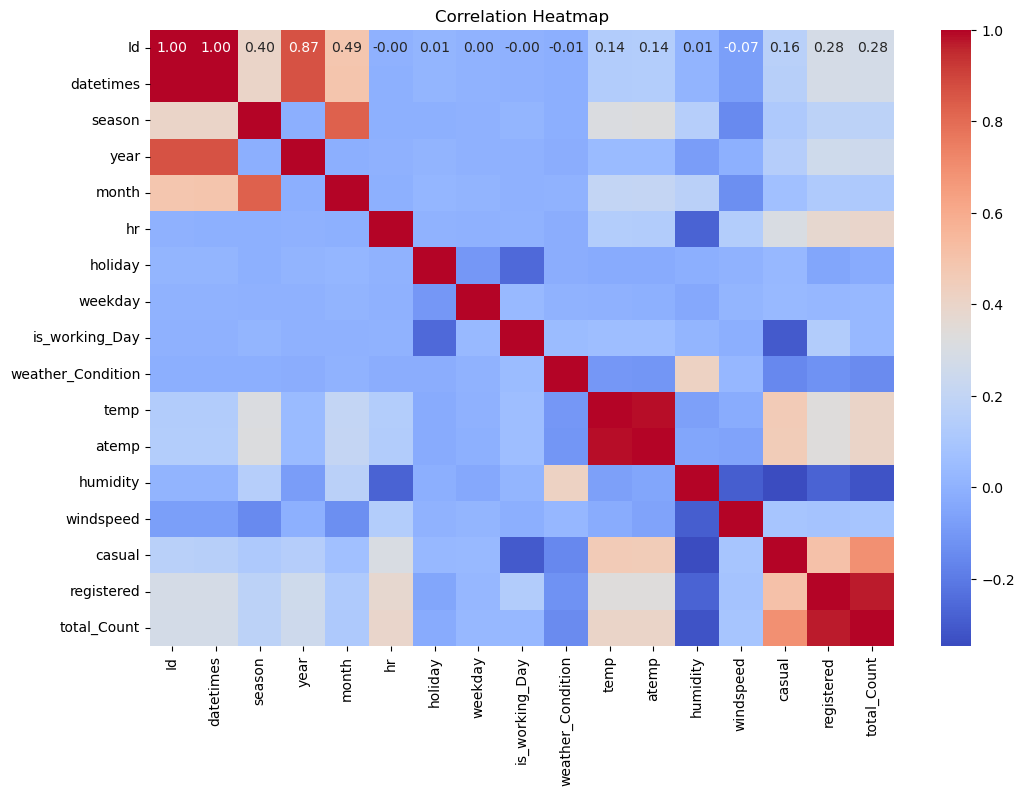

In [23]:

correlation = hour_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Distribusi total pengguna sepeda per jam

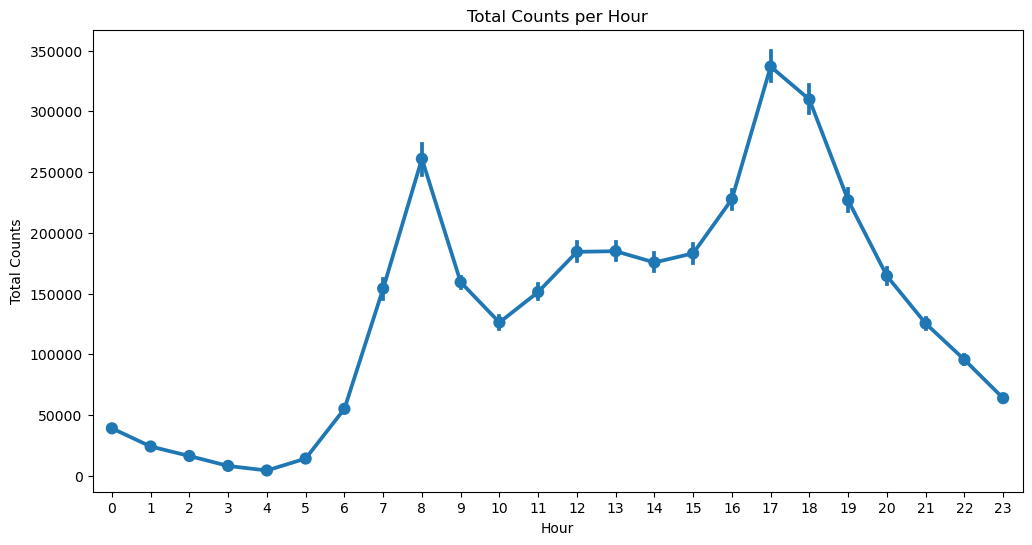

In [24]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='hr', y='total_Count', data=hour_df, estimator=sum)
plt.title('Total Counts per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Counts')
plt.show()

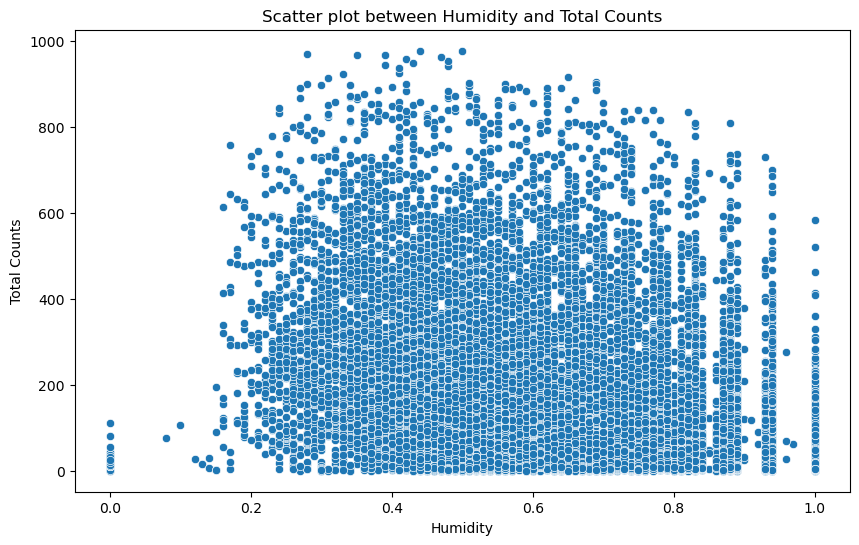

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='total_Count', data=hour_df)
plt.title('Scatter plot between Humidity and Total Counts')
plt.xlabel('Humidity')
plt.ylabel('Total Counts')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: berapa rata-rata total sewa sepeda pada hari libur dibandingkan dengan hari kerja?

In [26]:
rata2_rental_holiday = hour_df[hour_df["holiday"] == 1]["total_Count"].mean()
rata2_rental_working_day = hour_df[hour_df["holiday"] == 0]["total_Count"].mean()

print("Rata-rata total sewa sepeda pada hari libur:", rata2_rental_holiday)
print("Rata-rata total sewa sepeda pada hari kerja:", rata2_rental_working_day)

Rata-rata total sewa sepeda pada hari libur: 156.87
Rata-rata total sewa sepeda pada hari kerja: 190.4285798921737


### Pertanyaan 2: bagaimana pengaruh kondisi cuaca terhadap jumlah total sewa sepeda pada hari-hari yang tidak termasuk libur?

In [27]:
non_holiday_data = hour_df[hour_df["holiday"] == 0]

rata2_rental_by_weather = non_holiday_data.groupby("weather_Condition")["total_Count"].mean().reset_index()

print(rata2_rental_by_weather)

   weather_Condition  total_Count
0                  1   206.126084
1                  2   175.979124
2                  3   111.848962
3                  4    74.333333


### Pertanyaan 3: berapa rata-rata total sewa sepeda pada hari-hari libur selama bulan mei?

In [28]:
may_non_holiday_data = day_df[(day_df["month"] == 5) & (day_df["holiday"] == 0)]

rata2_rental_may_non_holiday = may_non_holiday_data["total_Count"].mean()

print("Rata-rata total sewa sepeda pada hari-hari yang bukan hari libur selama bulan Mei:", rata2_rental_may_non_holiday)

Rata-rata total sewa sepeda pada hari-hari yang bukan hari libur selama bulan Mei: 5359.083333333333


## Conclusion

- Conclution pertanyaan 1
Rata-rata total sewa sepeda pada hari libur adalah 156.87, sedangkan pada hari kerja adalah 190.43. Hal ini menunjukkan bahwa rata-rata total sewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.

- Conclution pertanyaan 2
Cuaca kategori 1 (cerah) memiliki rata-rata total sewa sepeda tertinggi, yaitu 206.13.
Cuaca kategori 2 (berawan) memiliki rata-rata total sewa sepeda di bawah kategori 1, yaitu 175.98.
Cuaca kategori 3 (berawan dan sedikit hujan/salju) memiliki rata-rata total sewa sepeda lebih rendah lagi, yaitu 111.85.
Cuaca kategori 4 (hujan/lebat) memiliki rata-rata total sewa sepeda terendah, yaitu 74.33. Hal ini menunjukkan adanya penurunan signifikan dalam jumlah sewa sepeda saat cuaca buruk.

- Conclution pertanyaan 3
Hal ini menunjukkan bahwa ada peningkatan signifikan dalam jumlah sewa sepeda pada hari-hari libur, khususnya pada bulan Mei. Hal ini mungkin disebabkan oleh faktor musiman atau liburan umum yang terjadi pada bulan tersebut.

In [29]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

In [30]:
all_df.to_csv("all_data.csv", index=False)